## Projeto de Aprendizado de Máquina de Ponta a Ponta

- Etapas do projeto:  

1. Olhar para o quadro Geral 
2. Obter os Dados
3. Descobrir e visualizar os dados 
4. Preparar ps dadps para os algoritmos de ML 
5. Selecionar e treinar os modelos 
6. Ajustar o seu modelo 
7. Apresentar sua solução 
8. Monitorar o sistema 

### Baixando Os dados 

Este código faz o download dos dados para o ambiente de trabalho e, em seguida, os carrega para que possam ser utilizados na análise. 

In [1]:
## Pacotes para o Projeto 
import os 
import tarfile 
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split


In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [5]:
## Salvando em DF 

housing = load_housing_data()
housing.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Um Rápida Olhada 

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


o método info() é útil para a obtenção de uma rápida descrição dos dados, em especial o número total de linhas, o tipo de cada atributo e o número de valores nulos. 

abaixo, se observa que, existem 20640 instâncias no conjunto de dados, o que significa que é muito pequeno para os padões de ML (Machine Learning), mas é bom para começar. Repare que o atributo total_bedrooms tem apenas 20433 valores não nulos (*non-null*), significa que 207 bairros não possuem esta característica. 

O total dos atributos são númericos, exceto o campo *ocean_proximity*, pode ser qualquer tipo objeto no python, mas como foi carregado em csv deve ser um tipo de texto  

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Podemos descobrir quais cvategorias existem e quantos bairros pertecem a cada categoria com o metódo *value_counts()* e com os dados númericos, podemos obster estatísticas descritivas, com o método *describe()*

In [8]:
## Categoricas
print(housing["ocean_proximity"].value_counts())

## Descritivas 
housing.describe()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Observe que os valores nulos são ignorados (por exemplo total_bedrooms é 20433 e não 20640), as linhas 25%, 50% e 76% mostram os percentis correspondentes. Outro método é utilizando o histograma.  

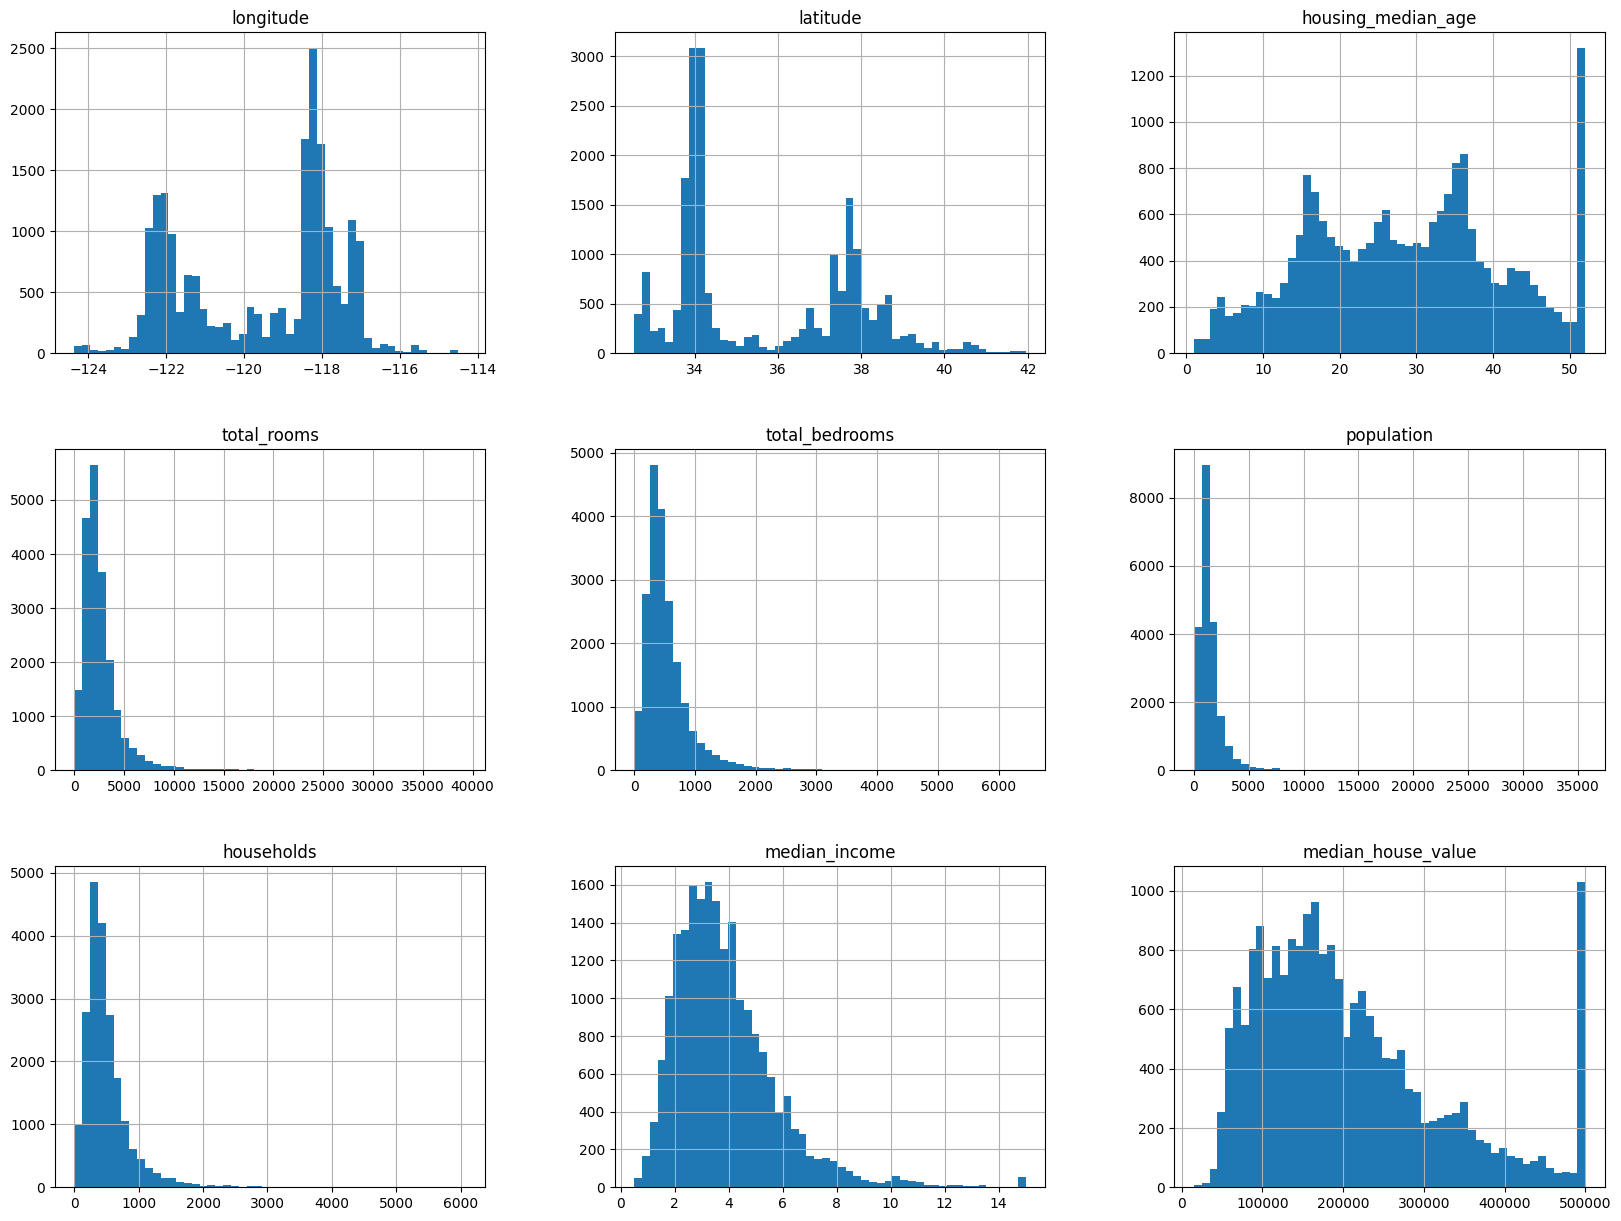

In [9]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Criando um conjunto de teste 

In [10]:
train_set, teste_set = train_test_split(housing, test_size=0.2, random_state=42)

supondo que você tenha conversado co, especialistas que lhe disseram que a renda média é um atributo muito importante para estimar os preços médios. Você precisa garantir que o conjunto de testes seja representativo das várias categorias de rendimentos em todo o conjunto de dados. Uma vez que arenda média é um atributo númerico continuo, primeiro você precisa criar um atributo na categoria renda. 

sobre o histograma, pode-se obsevar que: 

-  A maioria dos valores está agrupado em torno de US$ 20 mil - US$ 50 mil mas alguns rendimentos ultrapassam os US$ 60 mil

É importante ter um número sufucuente de instâncias para cada estrato em seu conjunto de dados, ou então a estimativa da importância do estrato poderá ser tedenciosa.  

o código a seguir cria um atributo da categoria da renda média por 1,5 e arredondando com utilização do ceil e, em seguida, mesclando todas as categorias maiores que 5, na categoria 5:



In [11]:
housing["income_cat"] = np.ceil(housing["median_income"]/ 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_1720\3086208766.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


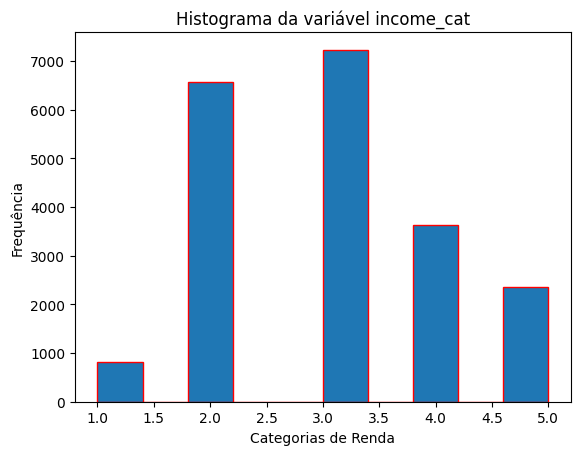

In [12]:
plt.hist(housing["income_cat"], bins=10, edgecolor="red")

plt.xlabel("Categorias de Renda")
plt.ylabel("Frequência")
plt.title("Histograma da variável income_cat")
plt.show()

In [13]:
## Amostras estratificadas 

from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [14]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace=True)

## Descubrindo e Visualizando os Dados

Até aqui demos apenas uma olhada  para ter uma compreensão geral do tipo de dados que está manipulando. Agora o objetivo é apronfundar-se um pouco mais. 

In [17]:
housing = strat_train_set.copy()

### Dados Geográficos

In [18]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: xlabel='longitude', ylabel='latitude'>

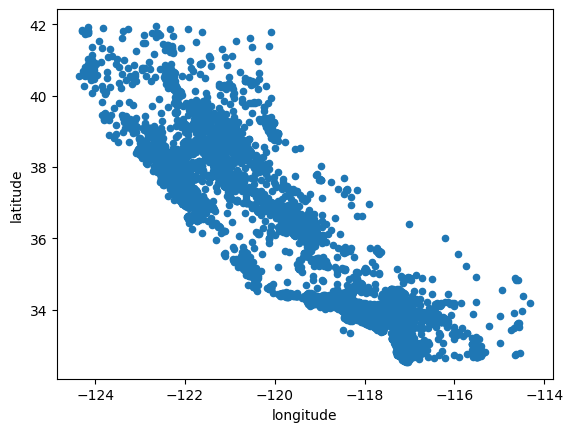

In [19]:
housing.plot(kind="scatter", x ="longitude", y="latitude")

Isso parece com a Califórnia, para facilitar podemos visualizar com densidade de pontos (alpha 0,1)

<Axes: xlabel='longitude', ylabel='latitude'>

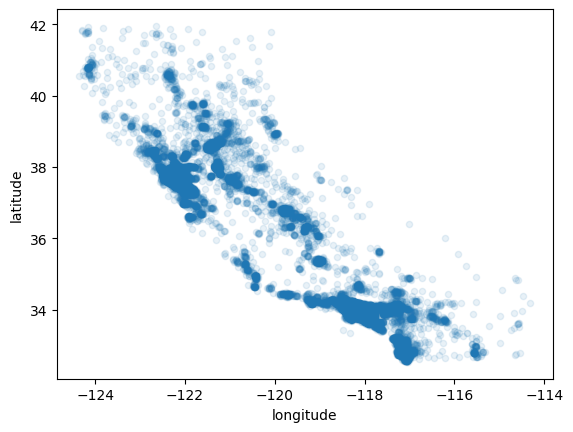

In [20]:
housing.plot(kind="scatter", x ="longitude", y="latitude", alpha = 0.1)

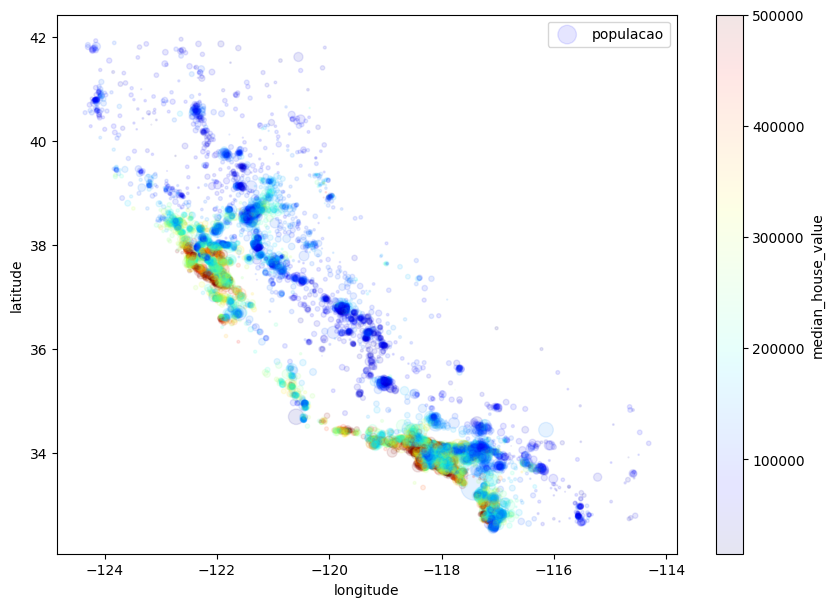

In [22]:
housing.plot(kind="scatter", x ="longitude", y="latitude", alpha = 0.1,
             s=housing["population"]/100, label="populacao", 
             figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

Será útil utilizar um algoritmo de agrupamento para detectar os grupos principais e adicionar novas características que medem a proximidade com os centros de agrupamento 

### Buscando Correlações

In [28]:
corr_matrix = housing.select_dtypes(include=['float64', 'int64']).corr()


In [30]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

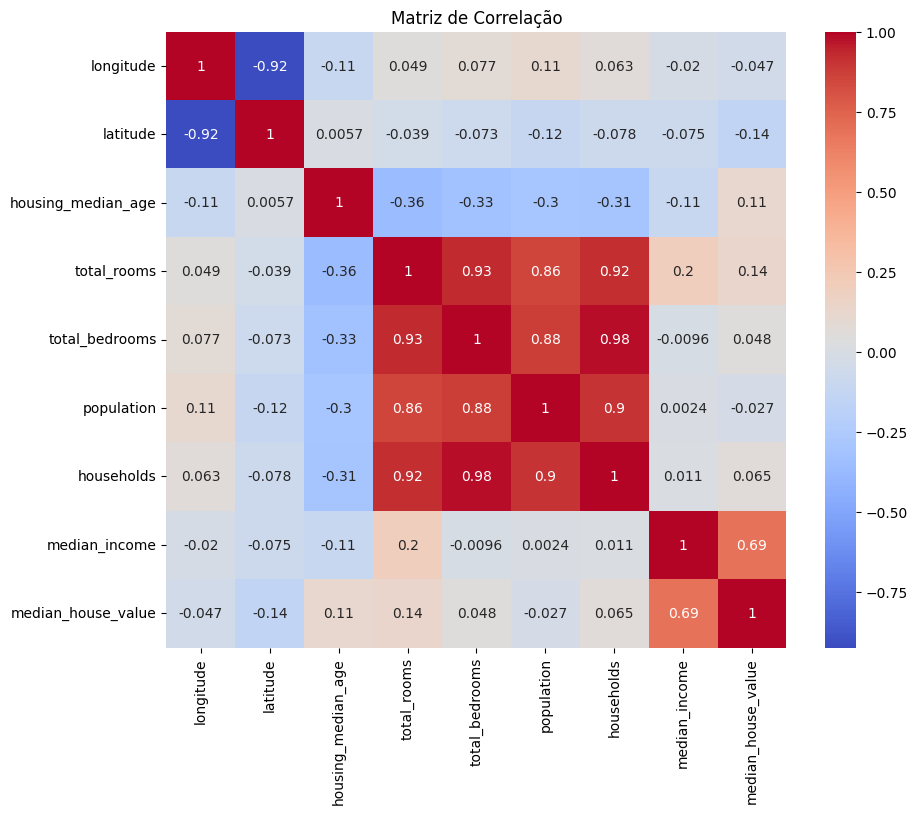

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(housing.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()


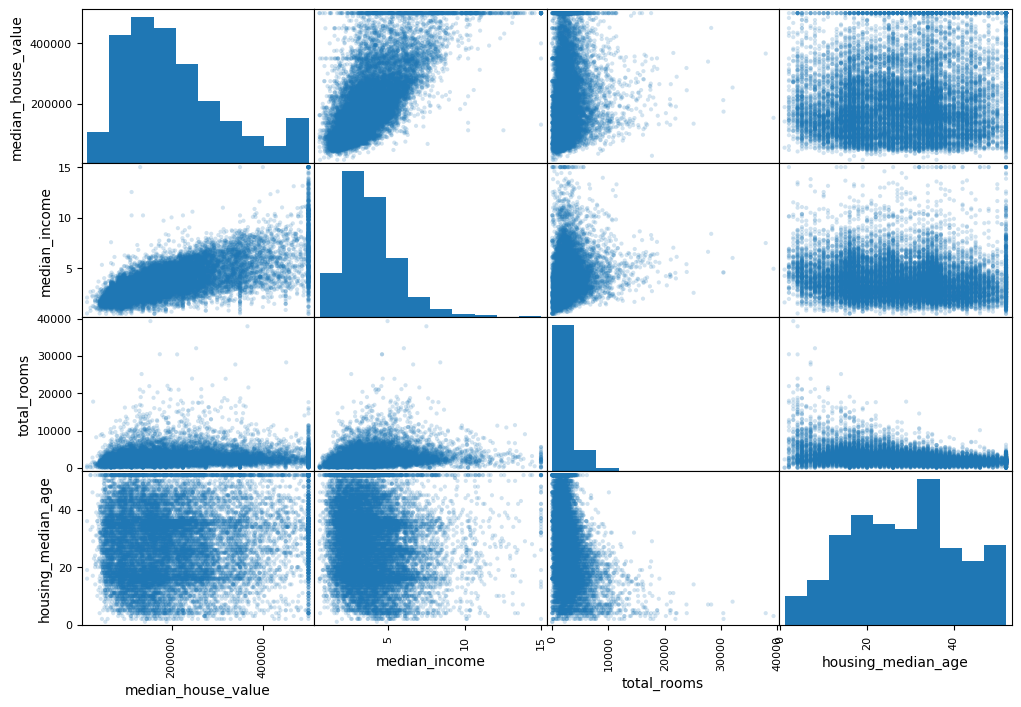

In [35]:
from pandas.plotting import scatter_matrix
# digamos que você quer analisar essas variáveis
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8), alpha=0.2)
plt.show()